## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

## Data Loading and Cleaning

### Load and Prepare dataset

In [5]:
# accessing to the folder where the file is stored
path = 'C:/Users/Abdullah/anaconda3/term-deposit-marketing-2020.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (40000, 14)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


## Check Numeric and Categorical Features

In [6]:
# IDENTIFYING NUMERICAL FEATURES

numeric_data = dataframe.select_dtypes(include=np.number)

# select_dtypes selects data with numeric features

numeric_col = numeric_data.columns

# we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   age  balance  day  duration  campaign
0   58     2143    5       261         1
1   44       29    5       151         1
2   33        2    5        76         1
3   47     1506    5        92         1
4   33        1    5       198         1


In [7]:
# IDENTIFYING CATEGORICAL FEATURES
categorical_data = dataframe.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns

# we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
            job  marital  education default housing loan  contact month   y
0    management  married   tertiary      no     yes   no  unknown   may  no
1    technician   single  secondary      no     yes   no  unknown   may  no
2  entrepreneur  married  secondary      no     yes  yes  unknown   may  no
3   blue-collar  married    unknown      no     yes   no  unknown   may  no
4       unknown   single    unknown      no      no   no  unknown   may  no


In [8]:
# CHECK THE DATATYPES OF ALL COLUMNS:

print(dataframe.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object


### Check Missing Data

In [9]:
# To identify the number of missing values in every feature

# Finding the total missing values and arranging them in ascending order
total = dataframe.isnull().sum()

# Converting the missing values in percentage
percent = (dataframe.isnull().sum()/dataframe.isnull().count())
print(percent)
dataframe.head()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
y            0.0
dtype: float64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


### Dropping missing values

In [10]:
# dropping features having missing values more than 60%
dataframe = dataframe.drop((percent[percent > 0.6]).index,axis= 1)

# checking null values
print(dataframe.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


### Fill null values in continuous features

In [11]:
# imputing missing values with mean

for column in numeric_col:
    mean = dataframe[column].mean()
    dataframe[column].fillna(mean,inplace = True)

#     imputing with median
#     for column in numeric_col:
#     mean = dataframe[column].median()
#     dataframe[column].fillna(mean,inpalce = True)

## Check for Class Imbalance

In [12]:
# we are finding the percentage of each class in the feature 'y'
class_values = (dataframe['y'].value_counts()/dataframe['y'].value_counts().sum())*100
print(class_values)

no     92.76
yes     7.24
Name: y, dtype: float64


## EDA & Data Visualizations

### Univariate analysis of Categorical columns

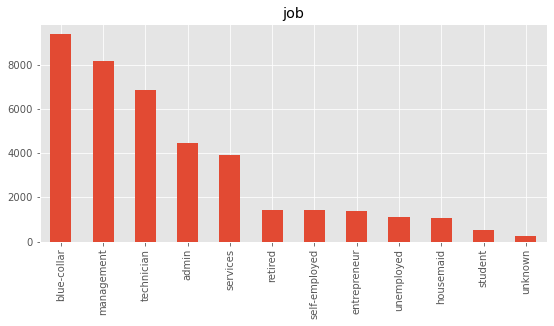

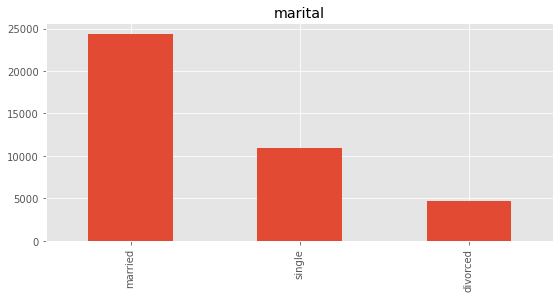

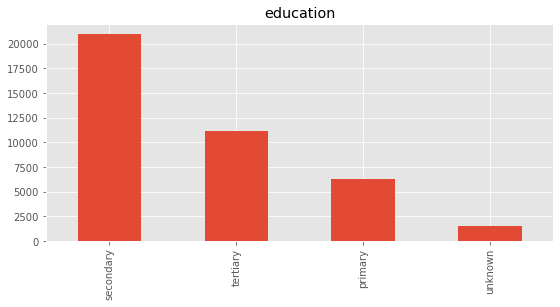

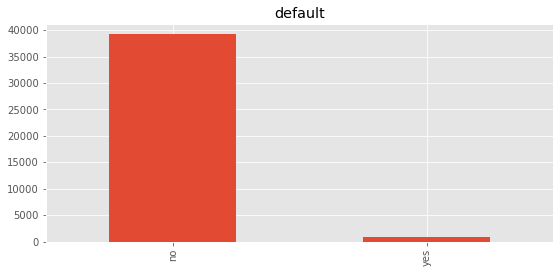

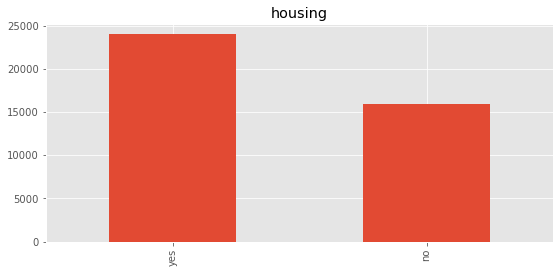

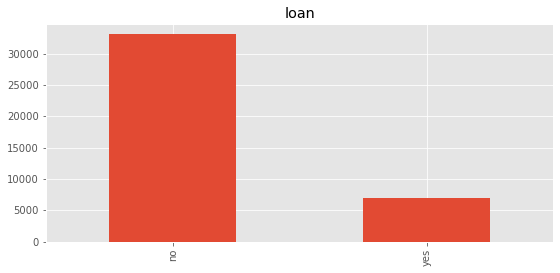

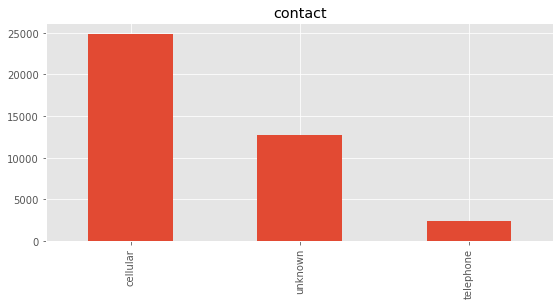

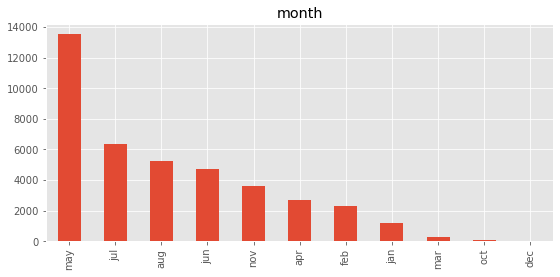

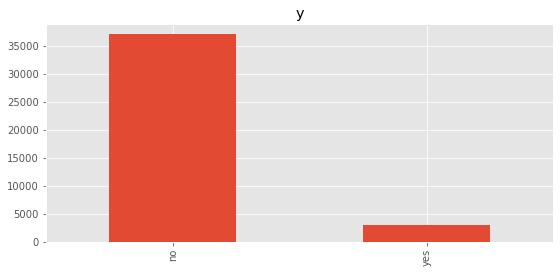

In [13]:
# Selecting the categorical columns
categorical_col = dataframe.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    dataframe[column].value_counts().plot(kind='bar')
    plt.title(column)

### Imputing unknown values of categorical columns

In [14]:
# Impute mising values of categorical data with mode
for column in categorical_col:
    mode = dataframe[column].mode()[0]
    dataframe[column] = dataframe[column].replace('unknown',mode)

### Univariate analysis of Continuous columns

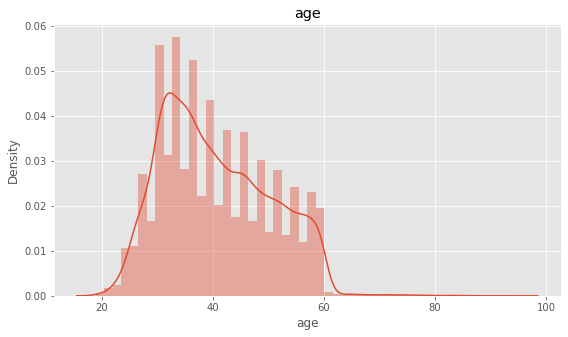

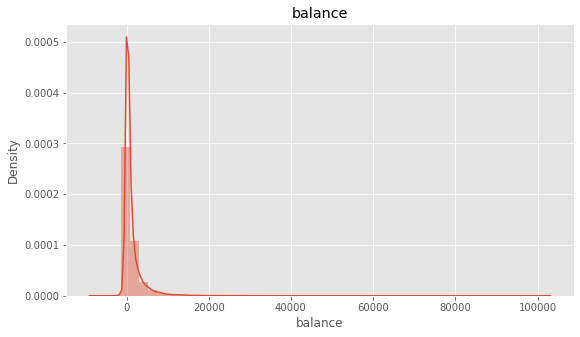

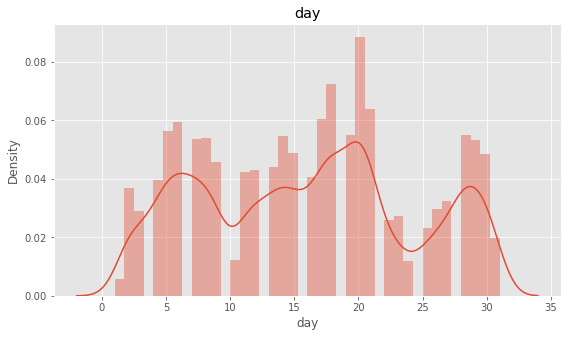

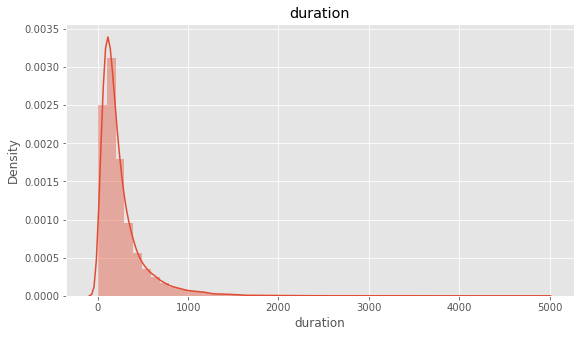

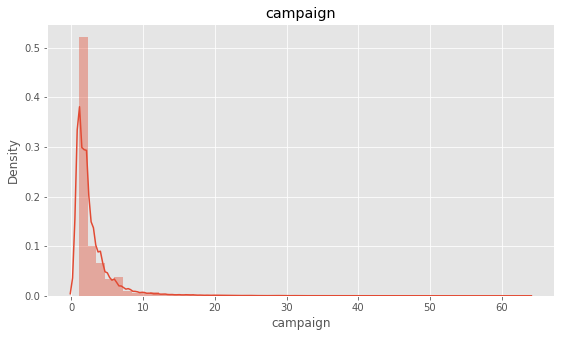

In [15]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(dataframe[column])
    plt.title(column)

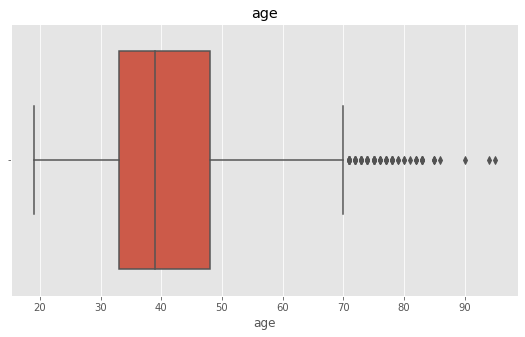

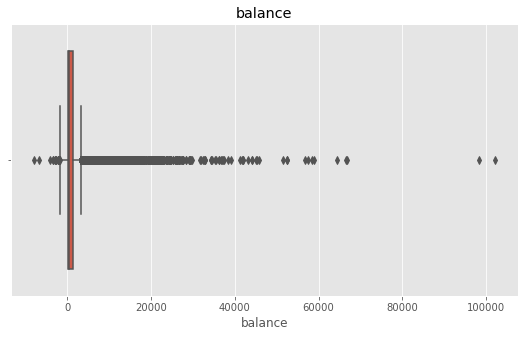

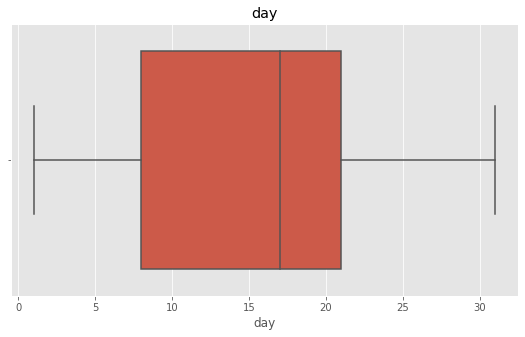

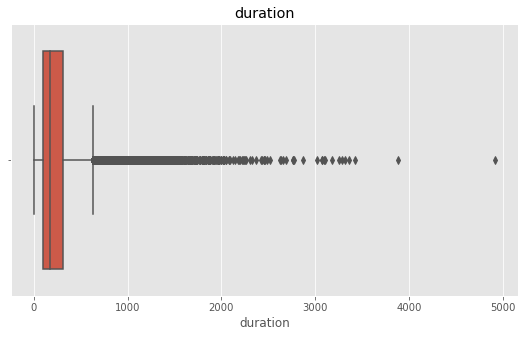

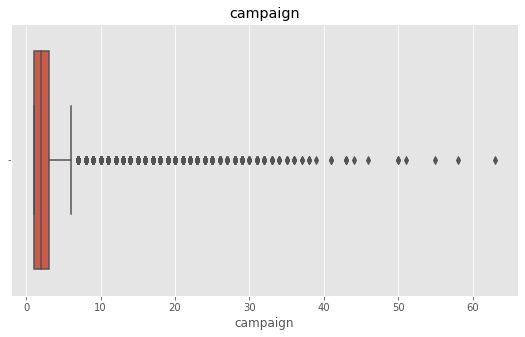

In [16]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(dataframe[column])
    plt.title(column)

### Bivariate Analysis - Categorical Columns

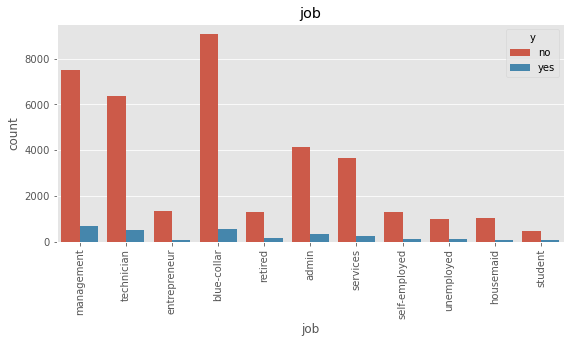

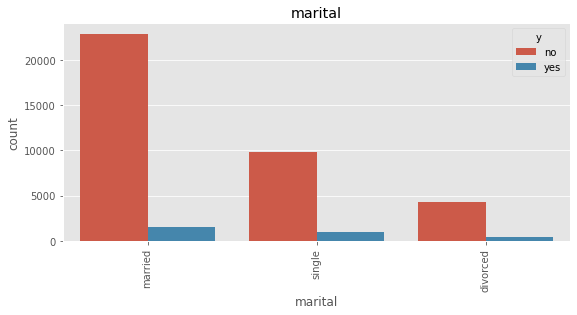

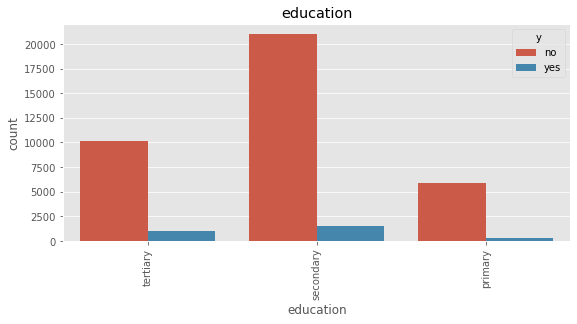

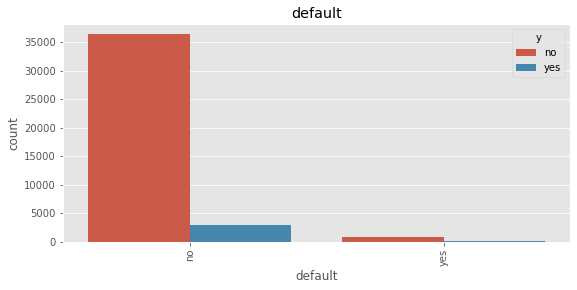

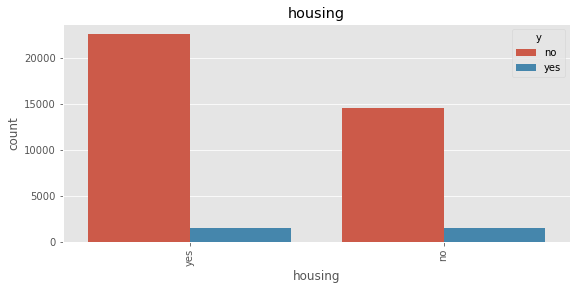

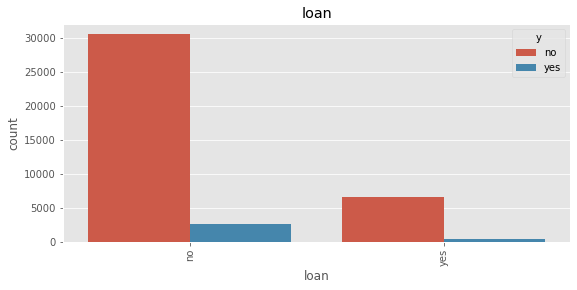

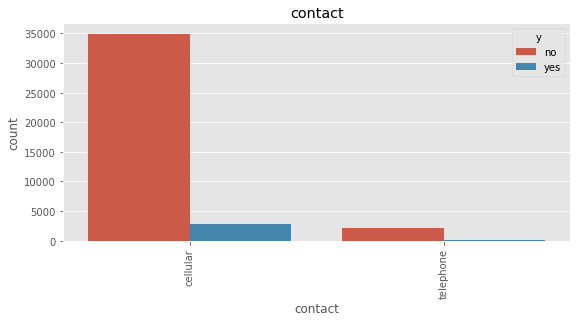

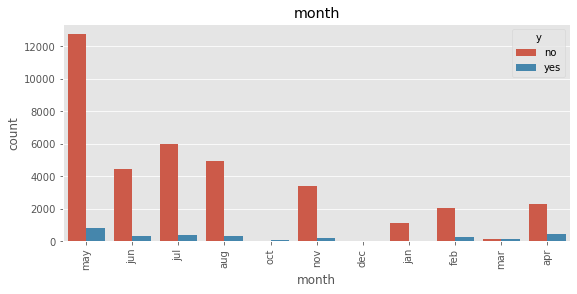

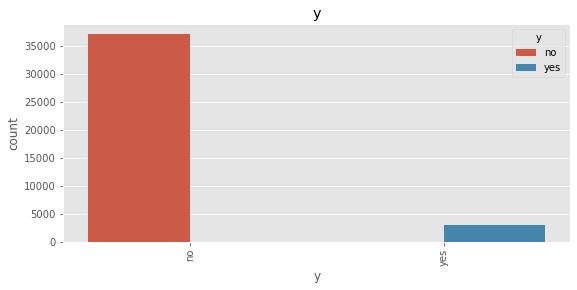

In [17]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=dataframe[column],hue=dataframe['y'],data=dataframe)
    plt.title(column)
    plt.xticks(rotation=90)

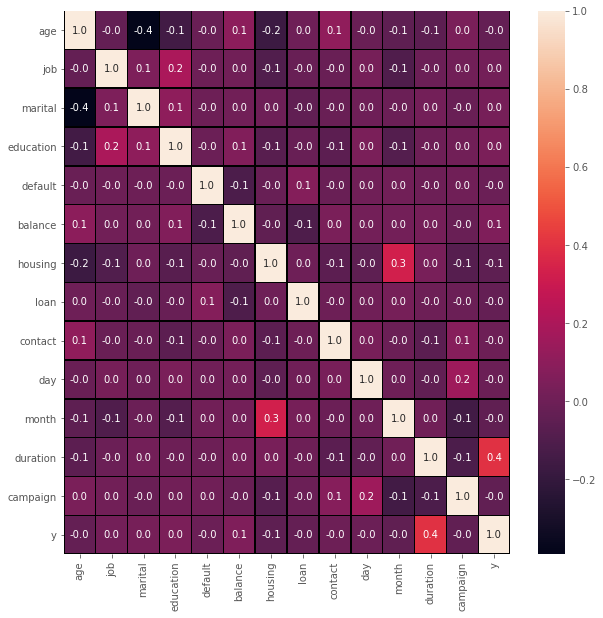

In [36]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(dataframe.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

### Treating outliers in the continuous columns

In [19]:
numeric_col = dataframe.select_dtypes(include=np.number).columns

for col in numeric_col:
    dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))

# Now run the code snippet to check outliers again

### Label Encode Categorical variables

In [20]:
# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        dataframe[feature] = le.fit_transform(dataframe[feature])
    except:
        print('Error encoding '+feature)

In [21]:
dataframe.to_csv(r'preprocessed_data.csv',index=False)

## Model Selection

#### Training And Test Datasets

In [22]:
X,y = dataframe.drop(["y"],1).values, dataframe["y"].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [23]:
# check the recorded instances of Train and test data sets for X nd y

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32000, 13)
(32000,)
(8000, 13)
(8000,)


In [24]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have a DataFrame 'dataframe' with features and target variable 'y'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop('y', axis=1), dataframe['y'], test_size=0.2, random_state=42)

# Separate majority and minority classes in the training set
df_majority = X_train[y_train == 0]
df_minority = X_train[y_train == 1]

# Upsample minority class in the training set
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),  # Match the number of majority class samples
                                 random_state=42)

# Combine the upsampled minority class with the majority class
X_train_upsampled = pd.concat([df_majority, df_minority_upsampled])
y_train_upsampled = pd.concat([pd.Series([0] * len(df_majority)), pd.Series([1] * len(df_minority_upsampled))])

# Train a classifier on the upsampled training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_upsampled, y_train_upsampled)

# Make predictions on the original test set
y_pred = rf_model.predict(X_test)

# Evaluate the model on the original test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.4f}")


Accuracy on the test set: 0.9250


In [26]:
# Get predicted probabilities for the positive class (class 1)
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Adjusting the classification threshold for better F1 score
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_f1 = 0
best_threshold = 0.6

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Set a custom threshold (e.g., 0.3)
for custom_threshold in np.arange(0.2, 0.8, 0.1):

  y_pred_custom = (y_probs >= custom_threshold).astype(int)

  # Evaluate the model using F1 score with the adjusted threshold
  f1_custom_threshold = f1_score(y_test, y_pred_custom)
  print(f"F1 Score with Custom Threshold ({custom_threshold}): {f1_custom_threshold:.4f}")
    
print(f"Best F1 Score: {best_f1:.4f} at Threshold: {best_threshold}")
    

F1 Score with Custom Threshold (0.2): 0.5135
F1 Score with Custom Threshold (0.30000000000000004): 0.5333
F1 Score with Custom Threshold (0.4000000000000001): 0.5104
F1 Score with Custom Threshold (0.5000000000000001): 0.4118
F1 Score with Custom Threshold (0.6000000000000001): 0.2633
F1 Score with Custom Threshold (0.7000000000000002): 0.1495
F1 Score with Custom Threshold (0.8000000000000003): 0.0663
Best F1 Score: 0.5256 at Threshold: 0.3


#### GETTING THE METRICS TO CHECK OUR MODEL PERFORMANCE - LOGISTIC REGRESSION

In [61]:
# Train a logistic regression model on the upsampled training set
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train_upsampled, y_train_upsampled)

# Get predicted probabilities for the positive class (class 1) using predict_proba
y_probs = logreg_model.predict_proba(X_test)[:, 1]
        
# Adjusting the classification threshold based on your specific needs
# Set a custom threshold (e.g., 0.3)
for custom_threshold in np.arange(0.2, 0.8, 0.1):

  y_pred_custom = (y_probs >= custom_threshold).astype(int)

  # Evaluate the model using F1 score with the adjusted threshold
  f1_custom_threshold = f1_score(y_test, y_pred_custom)
  print(f"F1 Score with Custom Threshold ({custom_threshold}): {f1_custom_threshold:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"Best F1 Score: {best_f1:.4f} at Threshold: {best_threshold}")


F1 Score with Custom Threshold (0.2): 0.2507
F1 Score with Custom Threshold (0.30000000000000004): 0.3010
F1 Score with Custom Threshold (0.4000000000000001): 0.3444
F1 Score with Custom Threshold (0.5000000000000001): 0.3786
F1 Score with Custom Threshold (0.6000000000000001): 0.4122
F1 Score with Custom Threshold (0.7000000000000002): 0.4369
F1 Score with Custom Threshold (0.8000000000000003): 0.4493
Confusion Matrix:
[[7185  239]
 [ 395  181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7424
           1       0.43      0.31      0.36       576

    accuracy                           0.92      8000
   macro avg       0.69      0.64      0.66      8000
weighted avg       0.91      0.92      0.91      8000

Best F1 Score: 0.4493 at Threshold: 0.8


In [42]:
# Train a Random Forest classifier on the upsampled training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_upsampled, y_train_upsampled)

# Get predicted probabilities for the positive class (class 1) using predict_proba
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Adjusting the classification threshold for better F1 score
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_f1 = 0
best_threshold = 0.7

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

# Set a custom threshold (e.g., 0.3)
for custom_threshold in np.arange(0.2, 0.8, 0.1):

  y_pred_custom = (y_probs >= custom_threshold).astype(int)

  # Evaluate the model using F1 score with the adjusted threshold
  f1_custom_threshold = f1_score(y_test, y_pred_custom)
  print(f"F1 Score with Custom Threshold ({custom_threshold}): {f1_custom_threshold:.4f}")
        

# Use the best threshold to make final predictions
y_pred_final = (y_probs >= best_threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_final)

# Classification Report
class_report = classification_report(y_test, y_pred_final)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"Best F1 Score: {best_f1:.4f} at Threshold: {best_threshold}")

F1 Score with Custom Threshold (0.2): 0.5135
F1 Score with Custom Threshold (0.30000000000000004): 0.5333
F1 Score with Custom Threshold (0.4000000000000001): 0.5104
F1 Score with Custom Threshold (0.5000000000000001): 0.4118
F1 Score with Custom Threshold (0.6000000000000001): 0.2633
F1 Score with Custom Threshold (0.7000000000000002): 0.1495
F1 Score with Custom Threshold (0.8000000000000003): 0.0663
Confusion Matrix:
[[6861  563]
 [ 170  406]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      7424
           1       0.42      0.70      0.53       576

    accuracy                           0.91      8000
   macro avg       0.70      0.81      0.74      8000
weighted avg       0.94      0.91      0.92      8000

Best F1 Score: 0.5256 at Threshold: 0.3


In [40]:
# Train a Decision Tree model on the upsampled training set
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_upsampled, y_train_upsampled)

# Get predicted probabilities for the positive class (class 1)
y_probs = dt_model.predict_proba(X_test)[:, 1]

# Adjusting the classification threshold based on F1 score
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
best_f1 = 0
best_threshold = 0.9

for threshold in thresholds:
    y_pred = (y_probs >= threshold).astype(int)
    f1 = f1_score(y_test, y_pred)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
        
# Set a custom threshold (e.g., 0.3)
for custom_threshold in np.arange(0.2, 0.8, 0.1):

  y_pred_custom = (y_probs >= custom_threshold).astype(int)

  # Evaluate the model using F1 score with the adjusted threshold
  f1_custom_threshold = f1_score(y_test, y_pred_custom)
  print(f"F1 Score with Custom Threshold ({custom_threshold}): {f1_custom_threshold:.4f}")

# Apply the best threshold
y_pred = (y_probs >= best_threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Best Threshold for Max F1 Score:", best_threshold)
print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)
print(f"Best F1 Score: {best_f1:.4f} at Threshold: {best_threshold}")

F1 Score with Custom Threshold (0.2): 0.3242
F1 Score with Custom Threshold (0.30000000000000004): 0.3242
F1 Score with Custom Threshold (0.4000000000000001): 0.3242
F1 Score with Custom Threshold (0.5000000000000001): 0.3242
F1 Score with Custom Threshold (0.6000000000000001): 0.3242
F1 Score with Custom Threshold (0.7000000000000002): 0.3242
F1 Score with Custom Threshold (0.8000000000000003): 0.3242
Best Threshold for Max F1 Score: 0.1
Confusion Matrix:
[[7085  339]
 [ 399  177]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7424
           1       0.34      0.31      0.32       576

    accuracy                           0.91      8000
   macro avg       0.64      0.63      0.64      8000
weighted avg       0.90      0.91      0.91      8000

Best F1 Score: 0.3242 at Threshold: 0.1


In [30]:
!pip install lightgbm


In [47]:
from lightgbm import LGBMClassifier

# Train a LightGBM model on the upsampled training set
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_upsampled, y_train_upsampled)

# Get predicted probabilities for the positive class (class 1) using predict_proba
y_probs = lgbm_model.predict_proba(X_test)[:, 1]

# Adjusting the classification threshold based on your specific needs
threshold = 0.8  # You can adjust this threshold
y_pred = (y_probs >= threshold).astype(int)

# Set a custom threshold (e.g., 0.3)
for custom_threshold in np.arange(0.2, 0.8, 0.1):

  y_pred_custom = (y_probs >= custom_threshold).astype(int)

  # Evaluate the model using F1 score with the adjusted threshold
  f1_custom_threshold = f1_score(y_test, y_pred_custom)
  print(f"F1 Score with Custom Threshold ({custom_threshold}): {f1_custom_threshold:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# F1 Score
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"Best F1 Score: {best_f1:.4f} at Threshold: {best_threshold}")

[LightGBM] [Info] Number of positive: 29680, number of negative: 29680
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 607
[LightGBM] [Info] Number of data points in the train set: 59360, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
F1 Score with Custom Threshold (0.2): 0.4190
F1 Score with Custom Threshold (0.30000000000000004): 0.4600
F1 Score with Custom Threshold (0.4000000000000001): 0.4932
F1 Score with Custom Threshold (0.5000000000000001): 0.5166
F1 Score with Custom Threshold (0.6000000000000001): 0.5261
F1 Score with Custom Threshold (0.7000000000000002): 0.5456
F1 Score with Custom Threshold (0.8000000000000003): 0.5577
Confusion Matrix:
[[6937  487]
 [ 165  411]]

Classification Report:
              precision

In [48]:

from sklearn.naive_bayes import GaussianNB

# Train a Gaussian Naive Bayes model on the upsampled training set
nb_model = GaussianNB()
nb_model.fit(X_train_upsampled, y_train_upsampled)

# Get predicted probabilities for the positive class (class 1) using predict_proba
y_probs = nb_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.3)
for custom_threshold in np.arange(0.2, 0.8, 0.1):

  y_pred_custom = (y_probs >= custom_threshold).astype(int)

  # Evaluate the model using F1 score with the adjusted threshold
  f1_custom_threshold = f1_score(y_test, y_pred_custom)
  print(f"F1 Score with Custom Threshold ({custom_threshold}): {f1_custom_threshold:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

print(f"Best F1 Score: {best_f1:.4f} at Threshold: {best_threshold}")

F1 Score with Custom Threshold (0.2): 0.2644
F1 Score with Custom Threshold (0.30000000000000004): 0.3137
F1 Score with Custom Threshold (0.4000000000000001): 0.3439
F1 Score with Custom Threshold (0.5000000000000001): 0.3764
F1 Score with Custom Threshold (0.6000000000000001): 0.4029
F1 Score with Custom Threshold (0.7000000000000002): 0.4347
F1 Score with Custom Threshold (0.8000000000000003): 0.4563
Confusion Matrix:
[[6937  487]
 [ 165  411]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      7424
           1       0.46      0.71      0.56       576

    accuracy                           0.92      8000
   macro avg       0.72      0.82      0.76      8000
weighted avg       0.94      0.92      0.93      8000

Best F1 Score: 0.5577 at Threshold: 0.8


In [57]:

from sklearn.neighbors import KNeighborsClassifier

# Train a KNN classifier on the upsampled training set
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_upsampled, y_train_upsampled)

# Get predicted probabilities for the test set (indirectly)
# KNN doesn't have a direct predict_proba, but you can use decision_function instead
# and normalize it to get probabilities
y_probs = knn_model.predict_proba(X_test)  # Not directly supported for KNN
y_probs_normalized = y_probs / y_probs.sum(axis=1, keepdims=True)  # Normalize to get probabilities

# Set a threshold for classification (you can experiment with different thresholds)
threshold = 0.4
y_pred = (y_probs_normalized[:, 1] >= threshold).astype(int)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[6326 1098]
 [ 225  351]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      7424
           1       0.24      0.61      0.35       576

    accuracy                           0.83      8000
   macro avg       0.60      0.73      0.63      8000
weighted avg       0.91      0.83      0.87      8000



In [50]:
# Train an XGBoost classifier on the upsampled training set
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_upsampled, y_train_upsampled)

# Get predicted probabilities for the positive class (class 1)
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Adjusting the classification threshold based on your specific needs
threshold = 0.6  # You can adjust this threshold
y_pred = (y_probs >= threshold).astype(int)

# Set a custom threshold (e.g., 0.3)
for custom_threshold in np.arange(0.2, 0.8, 0.1):

  y_pred_custom = (y_probs >= custom_threshold).astype(int)

  # Evaluate the model using F1 score with the adjusted threshold
  f1_custom_threshold = f1_score(y_test, y_pred_custom)
  print(f"F1 Score with Custom Threshold ({custom_threshold}): {f1_custom_threshold:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

# F1 Score
f1 = f1_score(y_test, y_pred)

print(f"\nBest F1 Score: {f1:.4f}")

print(f"Best F1 Score: {best_f1:.4f} at Threshold: {best_threshold}")

F1 Score with Custom Threshold (0.2): 0.4783
F1 Score with Custom Threshold (0.30000000000000004): 0.5067
F1 Score with Custom Threshold (0.4000000000000001): 0.5288
F1 Score with Custom Threshold (0.5000000000000001): 0.5413
F1 Score with Custom Threshold (0.6000000000000001): 0.5453
F1 Score with Custom Threshold (0.7000000000000002): 0.5307
F1 Score with Custom Threshold (0.8000000000000003): 0.4996
Confusion Matrix:
[[6901  523]
 [ 164  412]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      7424
           1       0.44      0.72      0.55       576

    accuracy                           0.91      8000
   macro avg       0.71      0.82      0.75      8000
weighted avg       0.94      0.91      0.92      8000


Best F1 Score: 0.5453
Best F1 Score: 0.5577 at Threshold: 0.8
